In [1]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line, resize, rescale)
import scipy.ndimage
from skimage.transform import hough_circle, hough_circle_peaks
from scipy.stats import norm
import scipy.stats as stats

import pandas as pd
import pickle
import time
from IPython import display

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']
x_resolution = y_resolution = 2304 ####????
x_resolution = y_resolution = 2048
from itertools import combinations
from skimage import io

In [3]:
tag  = 'TES'
runI = ["2356.tif"]
run = 2356
m_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)
s_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)

n0 = 0
for nRi in range(0,len(runI)):
    iTr = 0
    filename = runI[nRi]
    print ('Download and open file: '+cy.swift_fileByname(tag, filename))
    try:
        tmp_file = cy.swift_download_file(cy.swift_fileByname(tag, filename))
        print ("DONE")
    except:
        print ("File download ERROR")
        break
        
    print ('Open file: '+tmp_file)

    while True:
        try:    
            image = io.imread(tmp_file, img_num=iTr)
            iTr +=1
        except:
            print ("NO image at:"+ str(iTr))
            break
        m_image += image
        s_image += image**2 
        if n0 > 0:  # print progress and debung info for poit 200, 200...
            print ("Image[200,200]: %d => %.2f %.2f %.2f " % (iTr,
                                             image[200,200],
                                             np.sqrt((s_image[200,200] - 
                                                     m_image[200,200]**2 
                                                      / (n0+1)) / n0),
                                             m_image[200,200]/(n0+1),
                                             ))
        n0 += 1
    m_image = m_image/n0
    s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))
    
###### print Info and Save OutPut ######################################
    
print ("sigma %f" % (s_image[200,200]))
fileoutm = ("./data/run%d_mean.h5" % (run))
cy.write_image_h5(fileoutm, m_image)
fileouts = ("./data/run%d_sigma.h5" % (run))
cy.write_image_h5(fileouts, s_image)
print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))
if not cy.rm_file(tmp_file):
    print (">> File "+tmp_file+" removed")

Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/TES/2356.tif


  0.2%    3153920 / 1671702350

  0.8%   13746176 / 1671702350

  1.3%   22282240 / 1671702350

  1.9%   31588352 / 1671702350

  2.5%   42246144 / 1671702350

  3.1%   52101120 / 1671702350

  3.7%   61775872 / 1671702350

  4.5%   74596352 / 1671702350

  5.2%   86859776 / 1671702350

  6.0%  100007936 / 1671702350

  6.6%  110231552 / 1671702350

  7.3%  121397248 / 1671702350

  8.1%  135421952 / 1671702350

  8.9%  149438464 / 1671702350

  9.7%  162816000 / 1671702350

 10.4%  174096384 / 1671702350

 11.3%  188260352 / 1671702350

 12.0%  200515584 / 1671702350

 12.4%  207732736 / 1671702350

 13.1%  218447872 / 1671702350

 13.6%  226828288 / 1671702350

 14.2%  237273088 / 1671702350

 14.8%  247988224 / 1671702350

 15.5%  259022848 / 1671702350

 16.2%  270311424 / 1671702350

 16.8%  281198592 / 1671702350

 17.4%  291479552 / 1671702350

 18.1%  302333952 / 1671702350

 18.8%  314597376 / 1671702350

 19.5%  326647808 / 1671702350

 20.2%  336896000 / 1671702350

 20.8%  346980352 / 1671702350

 21.5%  359014400 / 1671702350

 22.3%  372891648 / 1671702350

 23.2%  387244032 / 1671702350

 23.7%  395919360 / 1671702350

 24.1%  403537920 / 1671702350

 24.6%  411090944 / 1671702350

 25.0%  418603008 / 1671702350

 25.5%  426377216 / 1671702350

 26.0%  434356224 / 1671702350

 26.5%  442425344 / 1671702350

 27.1%  453025792 / 1671702350

 27.8%  464683008 / 1671702350

 28.3%  473776128 / 1671702350

 29.1%  485761024 / 1671702350

 29.8%  498761728 / 1671702350

 30.6%  511860736 / 1671702350

 31.4%  525074432 / 1671702350

 32.1%  536969216 / 1671702350

 32.8%  548495360 / 1671702350

 33.5%  559988736 / 1671702350

 34.0%  568156160 / 1671702350

 34.6%  577732608 / 1671702350

 35.1%  587472896 / 1671702350

 35.7%  597458944 / 1671702350

 36.3%  606486528 / 1671702350

 36.9%  616071168 / 1671702350

 37.4%  625885184 / 1671702350

 38.0%  635502592 / 1671702350

 38.7%  646569984 / 1671702350

 39.5%  659595264 / 1671702350

 40.2%  672530432 / 1671702350

 40.9%  683204608 / 1671702350

 41.4%  692166656 / 1671702350

 42.0%  702488576 / 1671702350

 42.6%  712499200 / 1671702350

 43.3%  723083264 / 1671702350

 43.8%  732938240 / 1671702350

 44.3%  740950016 / 1671702350

 44.8%  749117440 / 1671702350

 45.6%  762044416 / 1671702350

 46.4%  775372800 / 1671702350

 47.2%  788447232 / 1671702350

 48.0%  801685504 / 1671702350

 48.6%  812998656 / 1671702350

 49.3%  824492032 / 1671702350

 49.5%  827719680 / 1671702350

 49.7%  830873600 / 1671702350

 50.1%  837279744 / 1671702350

 50.7%  848117760 / 1671702350

 51.3%  857743360 / 1671702350

 51.5%  861667328 / 1671702350

 51.7%  864944128 / 1671702350

 52.0%  869924864 / 1671702350

 52.2%  873201664 / 1671702350

 52.5%  878206976 / 1671702350

 52.7%  881590272 / 1671702350

 52.9%  884867072 / 1671702350

 53.2%  889438208 / 1671702350

 53.4%  893386752 / 1671702350

 53.7%  897187840 / 1671702350

 54.0%  902430720 / 1671702350

 54.2%  906657792 / 1671702350

 54.5%  910295040 / 1671702350

 54.7%  913833984 / 1671702350

 54.9%  918478848 / 1671702350

 55.1%  921239552 / 1671702350

 55.5%  928251904 / 1671702350

 56.1%  937975808 / 1671702350

 56.7%  947191808 / 1671702350

 57.2%  956678144 / 1671702350

 57.6%  963043328 / 1671702350

 57.9%  967385088 / 1671702350

 58.1%  971546624 / 1671702350

 58.4%  976093184 / 1671702350

 58.6%  978853888 / 1671702350

 58.7%  981598208 / 1671702350

 58.9%  984375296 / 1671702350

 59.1%  987209728 / 1671702350

 59.3%  990904320 / 1671702350

 59.4%  993705984 / 1671702350

 59.6%  996958208 / 1671702350

 59.8%  999686144 / 1671702350

 60.0% 1002307584 / 1671702350

 60.1% 1005133824 / 1671702350

 60.3% 1008467968 / 1671702350

 60.5% 1011613696 / 1671702350

 60.7% 1014497280 / 1671702350

 60.9% 1017380864 / 1671702350

 61.0% 1019871232 / 1671702350

 61.2% 1022255104 / 1671702350

 61.3% 1025376256 / 1671702350

 61.5% 1028128768 / 1671702350

 61.7% 1030881280 / 1671702350

 61.8% 1033633792 / 1671702350

 62.0% 1036124160 / 1671702350

 62.2% 1039007744 / 1671702350

 62.3% 1041358848 / 1671702350

 62.4% 1043857408 / 1671702350

 62.6% 1046609920 / 1671702350

 62.7% 1048870912 / 1671702350

 62.9% 1051459584 / 1671702350

 63.1% 1054212096 / 1671702350

 63.2% 1056710656 / 1671702350

 63.4% 1059586048 / 1671702350

 63.6% 1062879232 / 1671702350

 63.7% 1065353216 / 1671702350

 63.9% 1067728896 / 1671702350

 64.0% 1070235648 / 1671702350

 64.2% 1072824320 / 1671702350

 64.3% 1075617792 / 1671702350

 64.5% 1078362112 / 1671702350

 64.6% 1080696832 / 1671702350

 64.8% 1083981824 / 1671702350

 65.0% 1087160320 / 1671702350

 65.2% 1089994752 / 1671702350

 65.4% 1092878336 / 1671702350

 65.5% 1095630848 / 1671702350

 65.7% 1098121216 / 1671702350

 65.9% 1101004800 / 1671702350

 66.0% 1103233024 / 1671702350

 66.2% 1106509824 / 1671702350

 66.4% 1109565440 / 1671702350

 66.5% 1112408064 / 1671702350

 66.7% 1115561984 / 1671702350

 66.9% 1118699520 / 1671702350

 67.1% 1121452032 / 1671702350

 67.3% 1124990976 / 1671702350

 67.4% 1127243776 / 1671702350

 67.6% 1130102784 / 1671702350

 67.8% 1132855296 / 1671702350

 67.9% 1135214592 / 1671702350

 68.1% 1137704960 / 1671702350

 68.3% 1141735424 / 1671702350

 68.6% 1146060800 / 1671702350

 68.7% 1148469248 / 1671702350

 68.9% 1151991808 / 1671702350

 69.2% 1156710400 / 1671702350

 69.4% 1159725056 / 1671702350

 69.5% 1162608640 / 1671702350

 69.9% 1168506880 / 1671702350

 70.1% 1171300352 / 1671702350

 70.2% 1173504000 / 1671702350

 70.3% 1175977984 / 1671702350

 70.5% 1178861568 / 1671702350

 71.1% 1188151296 / 1671702350

 71.9% 1201242112 / 1671702350

 72.3% 1208303616 / 1671702350

 72.8% 1217347584 / 1671702350

 73.0% 1220280320 / 1671702350

 73.2% 1223294976 / 1671702350

 73.4% 1226964992 / 1671702350

100.0% 1671708672 / 1671702350


DONE
Open file: ./tmp.31288.root
Image[200,200]: 2 => 102.00 4.95 98.50 
Image[200,200]: 3 => 101.00 3.79 99.33 
Image[200,200]: 4 => 108.00 5.32 101.50 
Image[200,200]: 5 => 104.00 4.74 102.00 
Image[200,200]: 6 => 102.00 4.24 102.00 
Image[200,200]: 7 => 102.00 3.87 102.00 
Image[200,200]: 8 => 109.00 4.36 102.88 
Image[200,200]: 9 => 93.00 5.24 101.78 
Image[200,200]: 10 => 111.00 5.74 102.70 
Image[200,200]: 11 => 108.00 5.67 103.18 
Image[200,200]: 12 => 99.00 5.54 102.83 
Image[200,200]: 13 => 103.00 5.30 102.85 
Image[200,200]: 14 => 95.00 5.51 102.29 
Image[200,200]: 15 => 115.00 6.24 103.13 
Image[200,200]: 16 => 101.00 6.06 103.00 
Image[200,200]: 17 => 109.00 6.04 103.35 
Image[200,200]: 18 => 97.00 6.05 103.00 
Image[200,200]: 19 => 99.00 5.95 102.79 
Image[200,200]: 20 => 92.00 6.27 102.25 
Image[200,200]: 21 => 101.00 6.12 102.19 
Image[200,200]: 22 => 101.00 5.98 102.14 
Image[200,200]: 23 => 108.00 5.97 102.39 
Image[200,200]: 24 => 109.00 5.99 102.67 
Image[200,200]: 2

Image[200,200]: 197 => 102.00 5.57 101.44 
Image[200,200]: 198 => 97.00 5.57 101.41 
Image[200,200]: 199 => 106.00 5.56 101.44 
NO image at:199
sigma 5.561849


TypeError: %d format: a number is required, not str

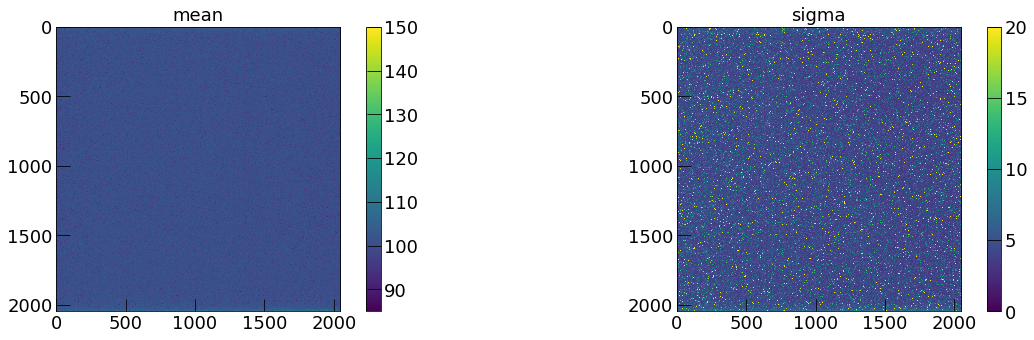

In [8]:
cy.set_atlas_style('long')
run = 2356
try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    imagem = cy.read_image_h5(fileoutm)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    images = cy.read_image_h5(fileouts)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2)
im = ax[0].imshow(imagem, vmin=85,vmax=150)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, vmin=0,vmax=20)
fig.colorbar(im, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2)
ax[0].hist(imagem.ravel(), bins=100, range=(0.0, 200.), fc='b', ec='k')
ax[1].hist(images.ravel(), bins=100, range=(0.0, 50.0), fc='r', ec='k')
ax[0].set_yscale("log")
ax[1].set_yscale("log")

plt.show()